**классификатор изображений MPL**

Евгений Борисов borisov.e@solarl.ru

In [34]:
import numpy as np


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout

from tensorflow.keras.datasets import mnist
from tensorflow.keras import utils 

In [4]:
np.random.seed(1671)

In [23]:
# network and training
NB_EPOCH = 200
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10   # number of outputs = number of digits
N_HIDDEN = 128
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION
DROPOUT = 0.3

In [6]:
# data: shuffled and split between train and test sets
#
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [7]:
# normalize 
X_train /= 255.0
X_test /= 255.0

RESHAPED = 784

# X_train is 60000 rows of 28x28 values --> reshaped in 60000 x 784
X_train = X_train.reshape(60000, RESHAPED).astype('float32')
X_test = X_test.reshape(10000, RESHAPED).astype('float32')

In [8]:
X_train.shape, X_test.shape

60000 train samples
10000 test samples


In [9]:
# convert class vectors to binary class matrices
Y_train = utils.to_categorical(y_train, NB_CLASSES)
Y_test = utils.to_categorical(y_test, NB_CLASSES)

In [10]:
# Y_train
# y_train

---

In [ ]:
# model = Sequential()
# model.add(Dense(NB_CLASSES, input_shape=(RESHAPED,)))
# model.add(Activation('softmax'))

In [32]:
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
#model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
#model.add(Dropout(DROPOUT))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))

In [12]:
model.summary()

---

In [25]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [26]:
%%time 

history = model.fit(X_train, Y_train,
                    batch_size=BATCH_SIZE, 
                    epochs=NB_EPOCH,
                    verbose=VERBOSE, 
                    validation_split=VALIDATION_SPLIT)

Train on 48000 samples, validate on 12000 samples
Epoch 1/200
48000/48000 [==============================] - 1s 24us/sample - loss: 1.6864 - acc: 0.4562 - val_loss: 0.9064 - val_acc: 0.8061
Epoch 2/200
48000/48000 [==============================] - 1s 22us/sample - loss: 0.9326 - acc: 0.7157 - val_loss: 0.5411 - val_acc: 0.8620
Epoch 3/200
48000/48000 [==============================] - 1s 22us/sample - loss: 0.7048 - acc: 0.7846 - val_loss: 0.4291 - val_acc: 0.8859
Epoch 4/200
48000/48000 [==============================] - 1s 22us/sample - loss: 0.5992 - acc: 0.8172 - val_loss: 0.3738 - val_acc: 0.8967
Epoch 5/200
48000/48000 [==============================] - 1s 24us/sample - loss: 0.5338 - acc: 0.8400 - val_loss: 0.3401 - val_acc: 0.9027
Epoch 6/200
48000/48000 [==============================] - 1s 21us/sample - loss: 0.4943 - acc: 0.8507 - val_loss: 0.3147 - val_acc: 0.9090
Epoch 7/200
48000/48000 [==============================] - 1s 22us/sample - loss: 0.4606 - acc: 0.8646 - val_l

Epoch 59/200
48000/48000 [==============================] - 1s 22us/sample - loss: 0.1660 - acc: 0.9505 - val_loss: 0.1205 - val_acc: 0.9640
Epoch 60/200
48000/48000 [==============================] - 1s 27us/sample - loss: 0.1657 - acc: 0.9511 - val_loss: 0.1190 - val_acc: 0.9645
Epoch 61/200
48000/48000 [==============================] - 1s 22us/sample - loss: 0.1633 - acc: 0.9513 - val_loss: 0.1190 - val_acc: 0.9649
Epoch 62/200
48000/48000 [==============================] - 1s 23us/sample - loss: 0.1601 - acc: 0.9526 - val_loss: 0.1180 - val_acc: 0.9655
Epoch 63/200
48000/48000 [==============================] - 1s 24us/sample - loss: 0.1578 - acc: 0.9534 - val_loss: 0.1166 - val_acc: 0.9653
Epoch 64/200
48000/48000 [==============================] - 1s 20us/sample - loss: 0.1619 - acc: 0.9512 - val_loss: 0.1161 - val_acc: 0.9653
Epoch 65/200
48000/48000 [==============================] - 1s 20us/sample - loss: 0.1578 - acc: 0.9534 - val_loss: 0.1148 - val_acc: 0.9662
Epoch 66/200


Epoch 117/200
48000/48000 [==============================] - 1s 21us/sample - loss: 0.1112 - acc: 0.9664 - val_loss: 0.0938 - val_acc: 0.9718
Epoch 118/200
48000/48000 [==============================] - 1s 21us/sample - loss: 0.1116 - acc: 0.9659 - val_loss: 0.0932 - val_acc: 0.9724
Epoch 119/200
48000/48000 [==============================] - 1s 21us/sample - loss: 0.1097 - acc: 0.9663 - val_loss: 0.0930 - val_acc: 0.9722
Epoch 120/200
48000/48000 [==============================] - 1s 21us/sample - loss: 0.1116 - acc: 0.9668 - val_loss: 0.0929 - val_acc: 0.9715
Epoch 121/200
48000/48000 [==============================] - 1s 21us/sample - loss: 0.1073 - acc: 0.9674 - val_loss: 0.0927 - val_acc: 0.9717
Epoch 122/200
48000/48000 [==============================] - 1s 20us/sample - loss: 0.1063 - acc: 0.9667 - val_loss: 0.0925 - val_acc: 0.9718
Epoch 123/200
48000/48000 [==============================] - 1s 21us/sample - loss: 0.1053 - acc: 0.9673 - val_loss: 0.0921 - val_acc: 0.9728
Epoch 

Epoch 175/200
48000/48000 [==============================] - 1s 19us/sample - loss: 0.0847 - acc: 0.9735 - val_loss: 0.0850 - val_acc: 0.9748
Epoch 176/200
48000/48000 [==============================] - 1s 19us/sample - loss: 0.0843 - acc: 0.9744 - val_loss: 0.0853 - val_acc: 0.9749
Epoch 177/200
48000/48000 [==============================] - 1s 20us/sample - loss: 0.0837 - acc: 0.9747 - val_loss: 0.0854 - val_acc: 0.9741
Epoch 178/200
48000/48000 [==============================] - 1s 21us/sample - loss: 0.0834 - acc: 0.9752 - val_loss: 0.0846 - val_acc: 0.9750
Epoch 179/200
48000/48000 [==============================] - 1s 24us/sample - loss: 0.0855 - acc: 0.9737 - val_loss: 0.0841 - val_acc: 0.9746
Epoch 180/200
48000/48000 [==============================] - 1s 28us/sample - loss: 0.0806 - acc: 0.9750 - val_loss: 0.0840 - val_acc: 0.9753
Epoch 181/200
48000/48000 [==============================] - 1s 20us/sample - loss: 0.0824 - acc: 0.9744 - val_loss: 0.0839 - val_acc: 0.9751
Epoch 

In [27]:
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)

print("\nTest score:", score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 0s 29us/sample - loss: 0.0771 - acc: 0.9765

Test score: 0.07712876591312233
Test accuracy: 0.9765


---

In [28]:
import matplotlib.pyplot as plt

In [29]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

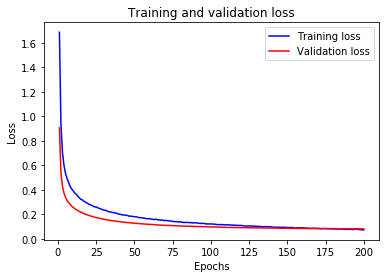

In [30]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

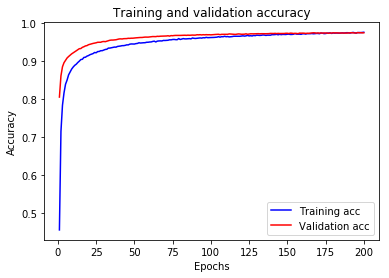

In [31]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

---

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.client import device_lib

In [2]:
print('tensorflow:', tf.__version__)
print('keras:', keras.__version__)

if tf.test.is_built_with_cuda():
    print('GPU devices:\n  ',
        [ [x.name, x.physical_device_desc] 
          for x in device_lib.list_local_devices() 
          if x.device_type == 'GPU' ]
    )
    print('default GPU device:', tf.test.gpu_device_name() )

else:
    print('no GPU device found')
    

tensorflow: 1.13.1
keras: 2.2.4-tf
no GPU device found
